# Biological question: Are there differences in the binding distance of the same TF-pair in different clusters? - PART1

This notebook can be used to analyse if there are differences in the binding distance of the same TF-pair in two different clusters.

In "Outline of this notebook" the general steps in the notebook are explained. The details for each general step are described directly in the notebook for the general step.  
**Needed input for notebook:** .pkl file with performed market basket analysis for the first of two chosen clusters for comparison.

(you can also have a look at TF-COMB docs)

#### Exemplary Data: WP2 - A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts

### Outline of this notebook:
This notbook presents the **first part** of the analysis to find out if there is a difference in the binding distance of the same TF-pair in different clusters. Here the first cluster is analysed. The results are then **saved in a .csv file and imported in the PART2 notebook**, where the second cluster is analysed and the comparison performed.   

    1. Implementation of distance analysis for first cluster
    2. Creating dataframe and saving results of first cluster in .csv file
    3. Possibility to have a closer look at the distance plot of a TF-pair

## 1. Implementation of distance analysis for cluster
0. Creation of folders for the structure if necessary, so the needed path for the output are existing
1. Read in **path of the .pkl file of the first chosen cluster from already performed market basket analysis** (alternative: perform normal market basket analysis) **(-> adjust for cluster)**
2. Using .simplify_rules(), so the duplicates of a TF-pair (because of the two orientations TF1-TF2 or TF2-TF1) are not displayed
3. Selection of TF-pairs by cosine and zscore
4. Implementation of distance analysis with considering the noisiness (lower noise, "clearer/better" analysis)



In [1]:
# The following lines, initally check if all file/paths are available. 
#If a result folder does not exist it is created automatically
import os
import pathlib
if not os.path.exists("./results/distanceresultsfordifference/"):
     pathlib.Path("./results/distanceresultsfordifference/").mkdir(parents=True, exist_ok=True)

In [2]:
import tfcomb.objects
clusterPART1_object = tfcomb.CombObj().from_pickle("/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/A8CPH_esophagus_muscularis_mucosa/A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts.pkl")
clusterPART1_object

<CombObj: 785174 TFBS (746 unique names) | Market basket analysis: 452808 rules>

In [3]:
clusterPART1_object.simplify_rules()

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


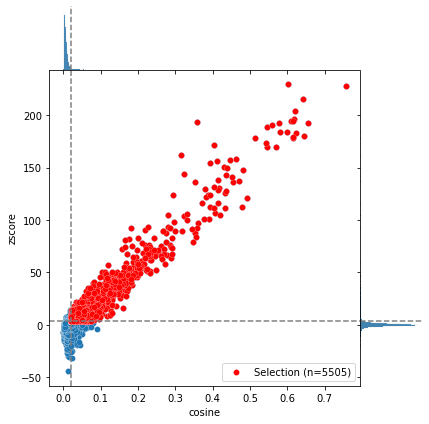

In [4]:
clusterPART1_object_selected = clusterPART1_object.select_significant_rules()

In [5]:
clusterPART1_object_selected.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [6]:
clusterPART1_object_selected.distObj.evaluate_noise(threads=6)
clusterPART1_object_selected.distObj.rank_rules()

INFO: Evaluating noisiness of the signals with 6 threads


## 2. Creating dataframe and saving results of first cluster in .csv file
1. Creation of dataframe df_distance_clusterPART1 with the results of the distance analysis of the first cluster so it can be easily merged with the dataframe of the second cluster
2. Reducing the TF co-occurrences by selecting the TF co-occurrences by peak hight above 2.8 (good proven boundary from other applications of distance analysis) and saving them **(-> adjust for cluster)** for PART2 notebook. 

In [7]:
df_distance_clusterPART1=clusterPART1_object_selected.distObj.peaks

In [8]:
df_distance_clusterPART1

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
2710,E2F1,E2F4,50,6.209171,6.398950,2,3,1.000000,0.000619,1.0,43.0,7.0,17.000000
2724,E2F4,E2F4,49,6.280213,6.472136,2,2,1.000000,0.001858,1.0,35.0,17.0,17.666667
2709,E2F1,E2F3,49,6.209107,6.398820,2,3,1.000000,0.001548,1.0,44.0,12.0,19.000000
2708,E2F1,E2F2,49,6.209107,6.398820,2,3,1.000000,0.001548,1.0,44.0,12.0,19.000000
2714,E2F2,E2F4,48,6.279968,6.472247,2,4,1.000000,0.003096,1.0,36.0,31.0,22.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,SP2,TFAP2A,7,2.000324,3.294795,2,97,0.061856,0.338424,1632.0,11306.0,4947.0,5961.666667
4978,EWSR1-FLI1,Stat2,87,2.002791,3.000914,2,263,0.041825,0.281061,2063.0,11271.0,4555.0,5963.000000
5031,FLI1,KLF15,44,2.007073,3.709886,2,96,0.062500,0.377342,1608.0,11233.0,5056.0,5965.666667
11896,ZFP42,ZNF148,24,2.010166,3.910864,2,241,0.062241,0.43833,1612.0,11192.0,5105.0,5969.666667


In [9]:
df_distance_clusterPART1[(df_distance_clusterPART1["Peak Heights"]>2.8)].to_csv("./results/distanceresultsfordifference/A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts.csv")
len(df_distance_clusterPART1[(df_distance_clusterPART1["Peak Heights"]>2.8)])

4411

## 3. Possibility to have a closer look at the distance plot of a TF-pair

####  Possibility to look at the distance plot of a specific TF co-occurrence

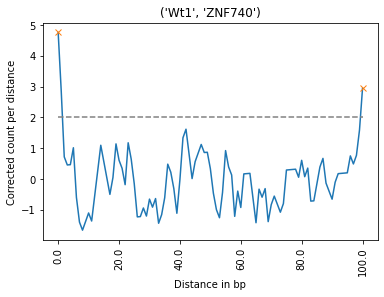

In [10]:
clusterPART1_object_selected.distObj.plot(("Wt1", "ZNF740"), method="signal")